In [1]:
import ROOT
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from random import random
import concurrent.futures
import time
from mpl_toolkits.mplot3d import axes3d

Welcome to JupyROOT 6.18/04


# Funcion Landau

In [2]:
c_0=100.
c_1=7. 

In [3]:
X_01 , Y_01 = [], []
X_01 = np.linspace(-10, 1000, 10000)
for j in X_01:
    Y_01.append(ROOT.TMath.Landau(j,c_0,c_1,True))     

Text(0.5, 1.0, 'Landau')

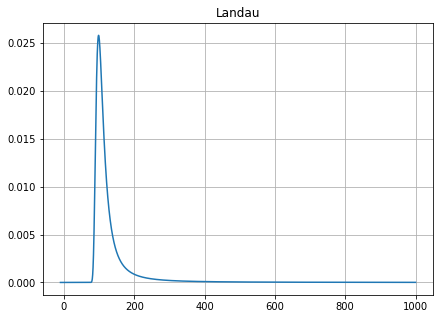

In [4]:
fig = plt.figure(figsize=(7,5))
plt.plot(X_01, Y_01)
plt.grid()
plt.title('Landau')

# Histograma de ROOT

In [5]:
DataChain=ROOT.TChain("SystemTree;1")
DataChain.Add("N1233192753.root")

1

In [6]:
NumberOfEventsToCheck=DataChain.GetEntries()
print("We are going to analyze ",NumberOfEventsToCheck, " events")

We are going to analyze  80000  events


In [7]:
Data = ROOT.TH1F('Data','Histograma',200,0,1000)
X_1=[]
for entry in DataChain:
    X=entry.x
    X_1.append(X)
    Data.Fill(X)

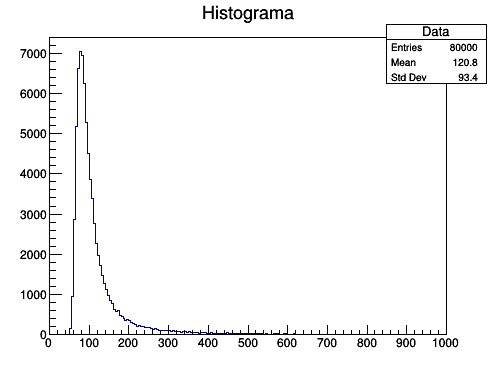

In [8]:
c1 = ROOT.TCanvas( 'c1', 'Histograma', 200, 10, 500, 400 )
c1.SetFillColor( 0 )
Data.Draw()
c1.Update()

ROOT.gROOT.GetListOfCanvases().Draw()

# Metropolis con Landau

In [9]:
x_min = min(X_1)
x_max = max(X_1)
print (x_min,x_max)

48.6094856262207 633624.75


In [10]:
# Metropolis

def Metropolis(Y):
    phi=[]
    phi_0 = x_min + (random()*(x_max-(x_min)))
    phi.append(phi_0)
    while len(phi)<Y:
        phi_p = x_min + (random()*(x_max-(x_min))) 
        deltaS= -np.log(ROOT.TMath.Landau(phi_p,c_0,c_1, True)/ROOT.TMath.Landau(phi_0,c_0,c_1, True))
        if deltaS<0:
            phi_1=phi_p
            phi.append(phi_1)
            #print (phi_1)
            phi_0=phi_1    
        elif deltaS>0:
      
            L1=ROOT.TMath.Landau(phi_p,c_0,c_1, True)
 
            L2=ROOT.TMath.Landau(phi_0,c_0,c_1, True)
            L=L1/L2
            #print (x,L)
            x=random()
            if x<L:
                phi_1=phi_p
                phi.append(phi_1)
                #print (phi_1)
                phi_0=phi_1
            elif x>L:
                continue               
    return phi            

In [11]:
start = time.perf_counter()

Phi=[]
with concurrent.futures.ProcessPoolExecutor() as executor:
    number = [20000 for _ in range(4)]
    phi_i = executor.map(Metropolis, number)
    
    for phi in phi_i:
        Phi+=phi 
        
finish = time.perf_counter()

print(f'Finished in {round((finish-start)/60.,2)} minuute(s)')

Finished in 35.25 minuute(s)


In [12]:
len(Phi)

80000

In [13]:
Data2 = ROOT.TH1F('Data2','Histograma2',200,0,1000)

for i in range(len(Phi)):
    d=Phi[i]
    Data2.Fill(d)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


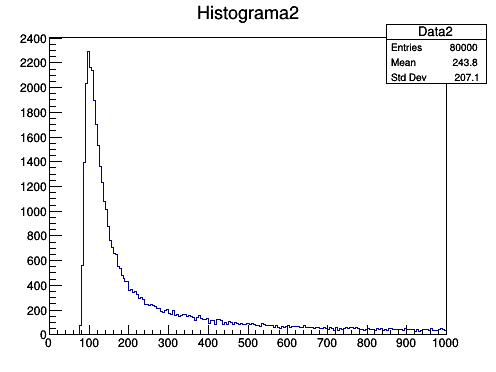

In [14]:
c2 = ROOT.TCanvas( 'c1', 'Histograma 2', 200, 10, 500, 400 )
c2.SetFillColor( 0 )
Data2.Draw()
#Data.Draw('same')
c2.Update()

ROOT.gROOT.GetListOfCanvases().Draw()

# Chi Cuadrado

In [15]:
C_0= [110., 120., 130., 140., 0]
C_1= [40., 50., 60., 80., 0]

In [16]:
for i in range(len(C_0)):
    f= open('Data_%d.py' %(i),'w+')
    f.write('import ROOT\n')
    f.write('import numpy as np\n')
    f.write('from random import random\n')
    f.write('import concurrent.futures\n')
    f.write('c_0=%d.\n' %(C_0[i]))
    f.write('c_1=%d.\n' %(C_1[i]))
    f.write('x_min=48.6094856262207\n')
    f.write('x_max=633624.75\n')
    f.write('def Metropolis(Y):\n')
    f.write('    phi=[]\n')
    f.write('    phi_0 = x_min + (random()*(x_max-(x_min)))\n')
    f.write('    phi.append(phi_0)\n')
    f.write('    while len(phi)<Y:\n')
    f.write('        phi_p = x_min + (random()*(x_max-(x_min))) \n')
    f.write('        deltaS= -np.log(ROOT.TMath.Landau(phi_p,c_0,c_1, True)/ROOT.TMath.Landau(phi_0,c_0,c_1, True))\n')
    f.write('        if deltaS<0:\n')
    f.write('            phi_1=phi_p\n')
    f.write('            phi.append(phi_1)\n')
    f.write('            phi_0=phi_1\n')
    f.write('        elif deltaS>0:\n')
    f.write('            L1=ROOT.TMath.Landau(phi_p,c_0,c_1, True)\n')
    f.write('            L2=ROOT.TMath.Landau(phi_0,c_0,c_1, True)\n')
    f.write('            L=L1/L2\n')
    f.write('            x=random()\n')
    f.write('            if x<L:\n')
    f.write('                phi_1=phi_p\n')
    f.write('                phi.append(phi_1)\n')
    f.write('                phi_0=phi_1\n')
    f.write('            elif x>L:\n')
    f.write('                continue \n')
    f.write('    return phi\n')
    f.write('Phi=[]\n')
    f.write('with concurrent.futures.ProcessPoolExecutor() as executor:\n')
    f.write('    number = [20000 for _ in range(4)]\n')
    f.write('    phi_i = executor.map(Metropolis, number)\n')
    f.write('    for phi in phi_i:\n')
    f.write('        Phi+=phi\n')    
    f.write('for j in range(len(Phi)):\n')
    f.write('    print (Phi[j])\n')

In [17]:
start = time.perf_counter()

! python Data_0.py >> test0.txt   
! python Data_1.py >> test1.txt   
! python Data_2.py >> test2.txt   
! python Data_3.py >> test3.txt   


finish = time.perf_counter()

print(f'Finished in {round((finish-start)/60.,2)} minuute(s)')

Finished in 22.56 minuute(s)


In [18]:
def Chi_2(X,Y,bins):
    x=0
    for i in range(bins):
        x += (X[i] - Y[i])**2/X[i]
    return x

In [19]:
bins=200

In [20]:
D_0=np.loadtxt('test0.txt')
D_1=np.loadtxt('test1.txt')
D_2=np.loadtxt('test2.txt')
D_3=np.loadtxt('test3.txt')

In [21]:
Chi=[]
for i in [D_0, D_1, D_2, D_3, Phi]:
    x=Chi_2(i, X_1, bins)
    Chi.append(x) 
    

In [22]:
Chi

[5997464.207705393,
 14254505.360919615,
 15699523.54987064,
 12048162.455164485,
 1993824.4476230321]

In [23]:
C_0[-1]=c_0

In [24]:
C_1[-1]=c_1

Text(0.5, 0.92, '$\\chi ^{2} (\\mu, c)$')

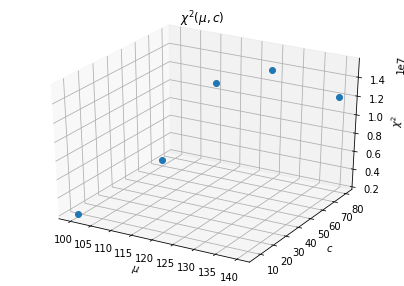

In [25]:
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')

ax.plot3D(C_0, C_1, Chi, 'o')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel('$c$')
ax.set_zlabel(r'$\chi ^{2}$')
ax.set_title(r'$\chi ^{2} (\mu, c)$')


In [26]:
Data3 = ROOT.TH1F('Data3','Ajuste',200,0,1000)

for i in range(len(Phi)):
    d=Phi[i]
    Data3.Fill(d)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


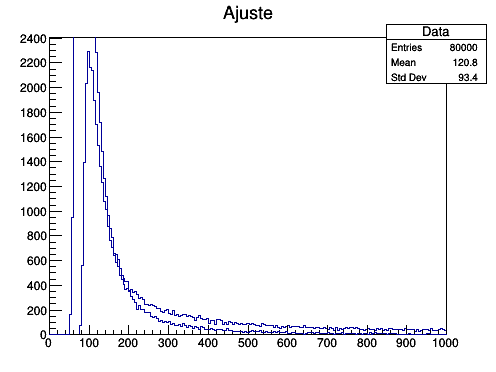

In [27]:
c3 = ROOT.TCanvas( 'c1', 'tite', 200, 10, 500, 400 )
c3.SetFillColor( 0 )
Data3.Draw()
Data.Draw('same')
c3.Update()

ROOT.gROOT.GetListOfCanvases().Draw()